# Neuronové sítě

Na přednášce jste slyšeli úvod do další přírodou inspirovaná techniky-- neuronových sítí. Mezi jejich nejjednodušší modely patří perceptron a vícevrstevný perceptron. Na cvičení si je tedy zkusíme sami naiplementovat.

## Perceptron

Nejprve si tedy zkusíme naimplementovat jednoduchý perceptronový algoritmus učení. K tomu budeme potřebovat třídu *Perceptron*, kde si definujeme, jak jednoduchý perceptron vypadá. Při inicializaci se nastaví maximální počet iterací a learning rate, který určuje rychlost učení algoritmu, a přípraví se prázdná matice vah rozšířená o jeden sloupeček samých 1, který bude simulovat přičtení prahu.

Funkce *Predict* nám pro daný vstup bude predikovat jeho výstup a to tak, že se spočítá hodnota aktivační funkce ve vstupním bodě a pokud bude větší než 0, bude aktivace 1, jinak bude aktivace 0. 

Budeme ještě potřebovat funkci *fit*, kde se budou trénovat váhy perceptronu tak, že pro daný vstup spočteme jeho predikovaný výstup a pokud je špatný, tak upravíme váhy tak, aby příště predikoval výstup správně.

In [71]:
import numpy as np
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pylab as pl
from sklearn import preprocessing
from sklearn.utils import shuffle

In [72]:
class Perceptron:
    def __init__(self, max_iterations, number_of_inputs, learning_rate=0.1):
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.weights = np.random.normal(size=number_of_inputs+1)
        
    def predict(self, inputs):
        # spocitame vystup funkce pro dany vstup, vahy a prah
        activation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        # spocitame aktivaci z funkce sgn do {-1,1} a to prevedeme na {0,1}
        return (np.sign(activation)+1)/2
    
    
    def fit(self, inputs, labels):
        for i in range(self.max_iterations):
            for x, y in zip(inputs, labels):
                prediction = self.predict(x)               
                # aktualizujem vahy a prahy
                self.weights[1:] += self.learning_rate * (y - prediction) * x
                self.weights[0] += self.learning_rate * (y - prediction)

Abychom náš perceptron otestovali, vygenerujem si náhodná data pomocí knihovny *scikit-learn*, která nám umí vrátit 2 lineárně separabilí třídy bodů.

In [73]:
inputs, labels = datasets.make_blobs(centers=2, n_samples=200)
perc = Perceptron(100,2)
perc.fit(inputs, labels)

Ještě by bylo dobré umět si vizualizovat výsledky, a proto si napíšeme následující funkci, která bude umět vykreslit data i oddělující nadrovinu.

In [74]:
def draw_boundary(model, inputs, labels):
    
    x_min = inputs[:, 0].min() - 1
    x_max = inputs[:, 0].max() + 1
    y_min = inputs[:, 1].min() - 1 
    y_max = inputs[:, 1].max() + 1

    # vytvori obdelnikovou mrizku s vyse spocitanymi rozmery
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # vykresleni rozhodovaci hranice -- kazdemu bodu se podle tho priradi barva
    predicted = model.predict(np.c_[xx.ravel(), yy.ravel()])
    predicted = predicted.reshape(xx.shape)
    
    plt.figure(figsize=(12,8))
    plt.scatter(inputs[:,0], inputs[:,1], c=labels)
    plt.contourf(xx, yy, predicted, alpha=0.4)
    plt.show()

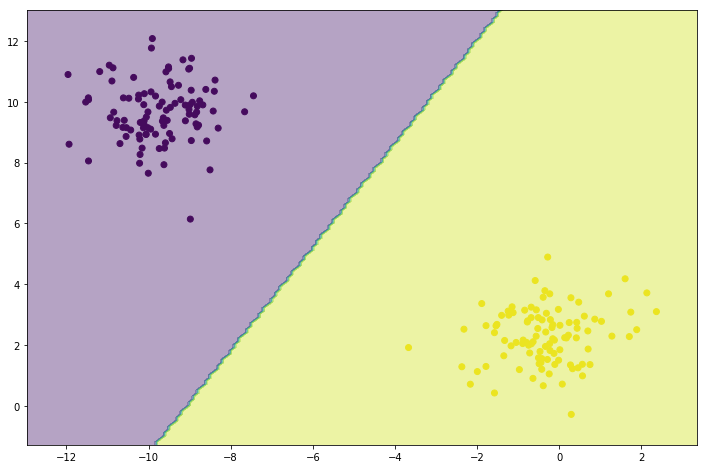

In [75]:
inputs, labels = datasets.make_blobs(centers=2, n_samples=200)
perc = Perceptron(100,2)
perc.fit(inputs, labels)
draw_boundary(perc, inputs, labels)

## Vícevrstvý perceptron

Jednoduchý perceptron už umíme, tak si nyní s jeho pomocí zkusíme napsat vícevrstevný perceptron, neboli celou neuronovou síť. V inicializační části nastavíme velikosti vrstev a poté matice vah mezi jednotlivými vrstvami jakožto náhodné hodnoty. Dále bude potřeba funkce predikce, která pro daný vstup spočítá výstup sítě a následně updatuje váhy pomocí backpropagace. Nakonec bude třeba už jen umět predikovat výstupní hodnotu sítě pro daný vstup.

In [76]:
class MultiLayerPerceptron:
    def __init__(self, layer_sizes,alpha=0.1):
        self.layer_sizes = layer_sizes
        self.layers = []
        self.alpha = alpha
        
        #for (p, n) in zip(self.layer_sizes, self.layer_sizes[1:]):
        #    self.layers.append(np.random.normal(size=(p+1, n)))
            
        for i in range(0,len(self.layer_sizes)-1):
            self.layers.append(np.random.normal(size=(self.layer_sizes[i]+1,self.layer_sizes[i+1])))
            
    def predict(self, X):
        activations = np.array(X)
        try:
            for layer in self.layers:
                activations = 1/(1+np.exp(np.dot(activations, layer[1:])+layer[0]))
                #activations_1 = self._add_ones(activations) # pridame 1 misto prahu
                #activations = 1/(1+np.exp(np.dot(activations_1, layer)))
        except Exception as e:
            print("Activations:", activations)
            raise e

        return activations
    
    def fit(self, inputs, outputs):
        pass
        # je potreba spocitat vystup site
        # pak je potreba update vah pomoci backpropagace
        # zkuste dopsat sami :P
        
    # pridame sloupecek jednicek k neuronum misto prahu     
    def _add_ones(self, x):
        ones = np.ones(shape=(x.shape[0],1))
        x = np.append(ones,x, axis=1)        
        return x

In [77]:
mlp = MultiLayerPerceptron([3,5,2])
mlp.predict(np.array([[1,2,3], [1,2,7]]))

array([[0.70596034, 0.25885303],
       [0.63924704, 0.29351247]])

## Úkol na cvičení

Zkuste si dopsat funkci ```fit``` u vícevrstevného perceptronu a natrénovat ho na datasetu *winequality-white.csv* z UCI machine learning repository. Cílem u tohoto datasetu je predikovat kvalitu vína na základě 12 změřených fyzikálních a chemických vlastností. Kvalita se hodnotí na stupnici 0-10. 

In [78]:
data = pd.read_csv('winequality-white.csv', delimiter=';')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [79]:
counter=collections.Counter(data['quality'])
print(counter)

Counter({6: 2198, 5: 1457, 7: 880, 8: 175, 4: 163, 3: 20, 9: 5})


Když se ale reálně podíváme na rozložení výsledných hodnot kvality vín v datasetu, tak vidíme, že většina výstupů je mezi 5-7. Proto si zjednoduššíme práci a dataset si upravíme tak, aby predikoval jen 3 výstupní kategorie s hodnotami 5-7 tak, že 3 a 4 sloučíme se 5 a zároveň 9 a 8 sloučíme se 7.

In [80]:
data['quality'].replace({3: 5, 4: 5,8: 7, 9: 7}, inplace=True)
counter=collections.Counter(data['quality'])
print(counter)

Counter({6: 2198, 5: 1640, 7: 1060})


 Na tomto upraveném datasetu si nyní zkusíme pustit vícevrstevný perceptron. Vidíme, že výsledky jsou nám k ničemu, protože nemáme naprogramovanou funkci ```fit```. Zkuste si ji doprogramovat. 

In [81]:
k = 10 
mlp = MultiLayerPerceptron([len(data.columns),k,data.quality.nunique()])
mlp.predict(data)

array([[0.68198539, 0.93311308, 0.13069387],
       [0.6449121 , 0.92133001, 0.16218824],
       [0.67822682, 0.93196871, 0.13370917],
       ...,
       [0.68183958, 0.93306889, 0.13081011],
       [0.64491205, 0.92132999, 0.16218829],
       [0.6449126 , 0.92133017, 0.16218779]])

## Knihovny tensorflow, keras, scikit-learn

Nejprve se seznámíme s pár základními knihovnami, které budeme používat pro snažší vytváření neuronových sítí a práci s nimi. Knihovna tensorflow je symbolická matematická knihovna, která slouží pro dataflow, tedy obsahuje grafové moduly a operace, nad kterými se následně dají implementovat různé algoritmy strojového učení. Nad ní běží knihovna keras, která je navržena pro snadné experimentování s hlubokýcmi neuronovými sítěmi. Knihovna scikit-learn zase obsahuje všechny možné běžné algoritmy strojového učení.

Všechny tyto knihovny byly navrženy, aby uživateli zjednodušili práci se zpracováním dat a následné vytváření predikčních a jiných modelů, ať už pomocí neurovnových sítí nebo jiných algoritmů strojového učení.

Zkusíme si tedy s pomocí těchto knihoven naimplementovat tu samou jednoduchou neuronovou sít, jako jsme si ručně psali výše. Budeme potřebovat si vyrobit data, potom definovat síť a nakonec ji natrénovat na trénovacích datech a nechat ji predikovat a změřit chybu na testovacích datech.

Nejprve si vytvoříme náhodná dvojrozměrná data klasifikovatelná do n tříd, abychom si je mohli i hezky vizualizovat v grafu. K tomu bude potřeba si upravit funkci pro vizualizaci, protože vícetřídová klasifikace nám vrací výstup jakožte pole, kde pro tu jednu vybranou třídu (ideálně) bude na jejím indexu 1 a všude jinde budou 0. Tomuto výstupu se tak říká one-hot-encoding.

In [82]:
def draw_boundary(model, inputs, labels):
    
    x_min = inputs[:, 0].min() - 1
    x_max = inputs[:, 0].max() + 1
    y_min = inputs[:, 1].min() - 1 
    y_max = inputs[:, 1].max() + 1

    # vytvori obdelnikovou mrizku s vyse spocitanymi rozmery
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # vykresleni rozhodovaci hranice -- kazdemu bodu se podle tho priradi barva
    predicted = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # pridana radka pro vyber klasifikovane tridy
    predicted = np.argmax(predicted, axis=1)
    
    predicted = predicted.reshape(xx.shape)
    
    plt.figure(figsize=(12,8))
    plt.scatter(inputs[:,0], inputs[:,1], c=labels)
    plt.contourf(xx, yy, predicted, alpha=0.4)
    plt.show()
    model.predict(x_test[:10])

Když mám upravenou funkci pro vizualizaci, tak si vygeneruji náhodná data a podívám se, jako byl model úspěšný, tedy jak dobře se natrénoval na trénovacích datech a umí predikovat testovací data.

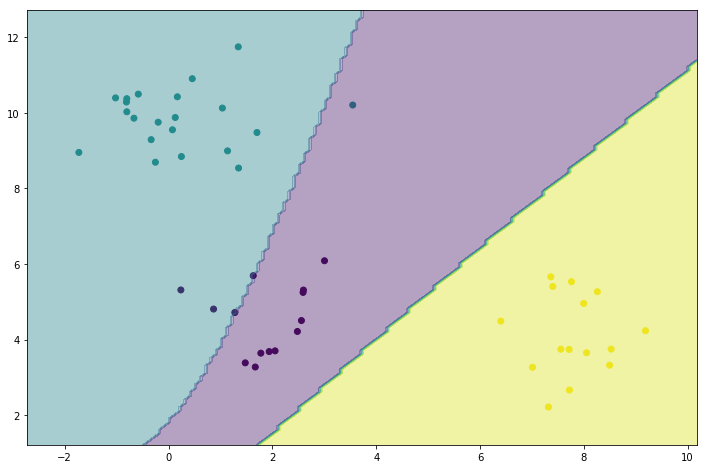

In [83]:
# nejprve si pripravime data a rozdelime na trenovaci a testovaci mnozinu
n = 3
x, y = datasets.make_blobs(n_samples=300, centers=n)

x_train, x_test = x[:250], x[250:]
y_train, y_test = y[:250], y[250:]

# definujeme architekture site
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(n, activation=tf.nn.softmax))


# nastavime optimalizaci
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# natrenujeme sit na trenovacich datech
model.fit(x_train, y_train, epochs=200, verbose=0)
# udelame predpovedi na trenovacich datech
draw_boundary(model, x_test, y_test)


Ještě si zkusíme pustit neuronovou síť z tensorflow na nějakém reálném datasetu. Nejjednodušší volbou je dataset o víně, který jsme si už popsali výše. Aby však síť mohla správně klasifikovat labely, je potřeba je posunout z množiny {5,6,7} do množiny {0,1,2}. Následně ještě provedeme normalizaci ostatních hodnot tak, že všechny budou sloupečky budou mít hodonty v intervalu [0,1]. Normalizace se dělá proto, aby se nestalo, že některý sloupeček s hodně vysokými hodnotami bude mít příliš velký vliv na výsledný label, a může potom data zkreslovat. 

In [84]:
# nahodne zamichani dat
data = shuffle(data)

# posun vystupnich labelu
data['quality'].replace({5: 0, 6: 1, 7: 2}, inplace=True)
labels = data['quality'].values

# normalizace dat
values = data[data.columns.difference(['quality'])].values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(values)

# rozdelime na trenovaci a testovaci mnozinu
x, y = data_scaled, labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# definujeme architekture site
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

# nastavime optimalizaci
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# natrenujeme sit na trenovacich datech
model.fit(x_train, y_train, epochs=200, verbose=0)

Zkusíme si predikovat výstup na testovacích datech a spočítat chybu. 

In [85]:
# predikce na test datech
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=-1)
model_mse = mean_squared_error(predicted_classes,y_test)
print(model_mse)

0.5673469387755102


Na závěr se podíváme pomocí matice konfuze, která nám říká, která třída byla kolikrát dobře nebo zle predikovaná.

[[257 147   0]
 [173 378   3]
 [ 38 220   9]]


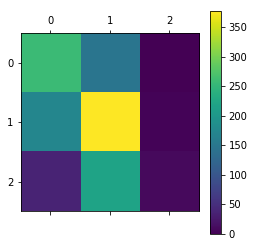

[[404   0   0]
 [  0 554   0]
 [  0   0 267]]


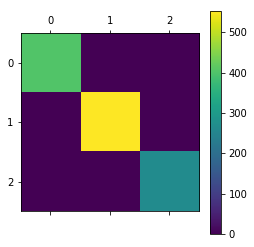

In [86]:
# vykresleni, jak bylo co klasifikovano
confusion_matrix = metrics.confusion_matrix(y_test, predicted_classes)
print(confusion_matrix)

pl.matshow(confusion_matrix)
pl.colorbar()
pl.show()

confusion_matrix = metrics.confusion_matrix(y_test, y_test)
print(confusion_matrix)

pl.matshow(confusion_matrix)
pl.colorbar()
pl.show()